# Bike sharing dataset 

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("white")
mpl.rcParams['figure.figsize'] = (20,5)

## Data Cleansing 

In [6]:
bike_hour = pd.read_csv("hour.csv")
bike_day = pd.read_csv("day.csv")


In [7]:
bike_hour.set_index(['dteday'], inplace=True)


In [8]:
bike_day.set_index(['dteday'], inplace=True)


In [9]:
bike_day.index = pd.to_datetime(bike_day.index)
bike_hour.index = pd.to_datetime(bike_hour.index)


In [10]:
bike_day_str = bike_day.copy()
bike_day_str.index = bike_day.index.strftime('%Y-%m-%d')

In [11]:
bike_2011day = bike_day.loc['2011']
bike_2012day = bike_day.loc['2012']
bike_2011hr = bike_hour.loc['2011']
bike_2012hr = bike_hour.loc['2012']

## Weather Related Factors 

### Scatter Plot & Regression Line

First will look at temperature, humidity, and windspeed and compare it to the number of users for each year 2011 and 2012 respectively.

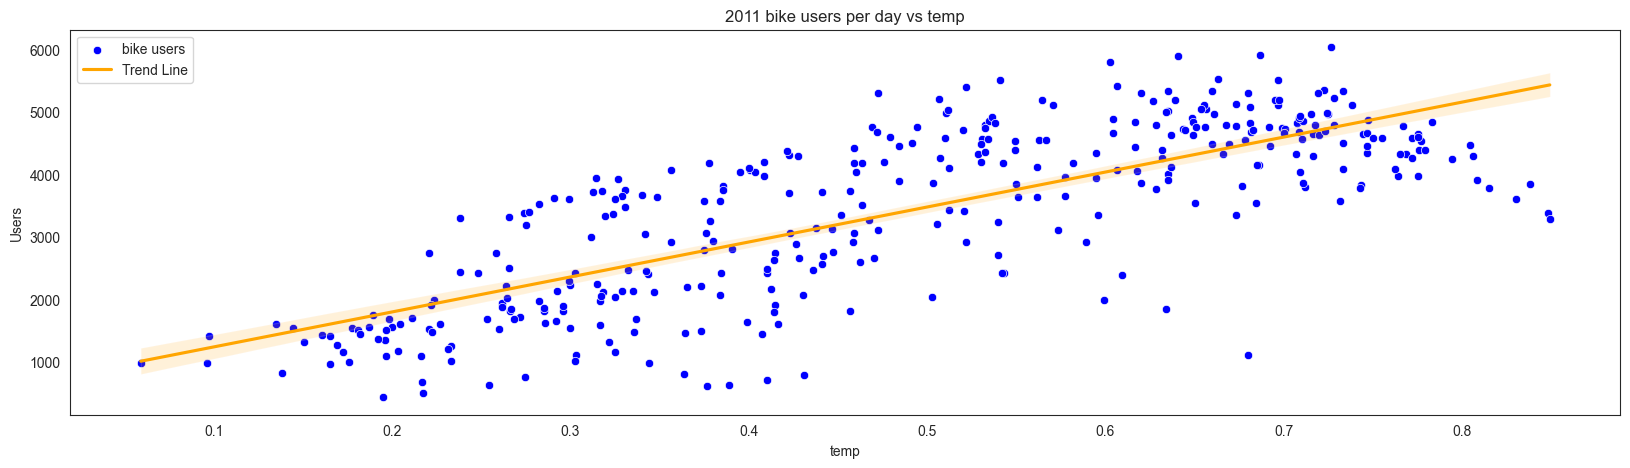

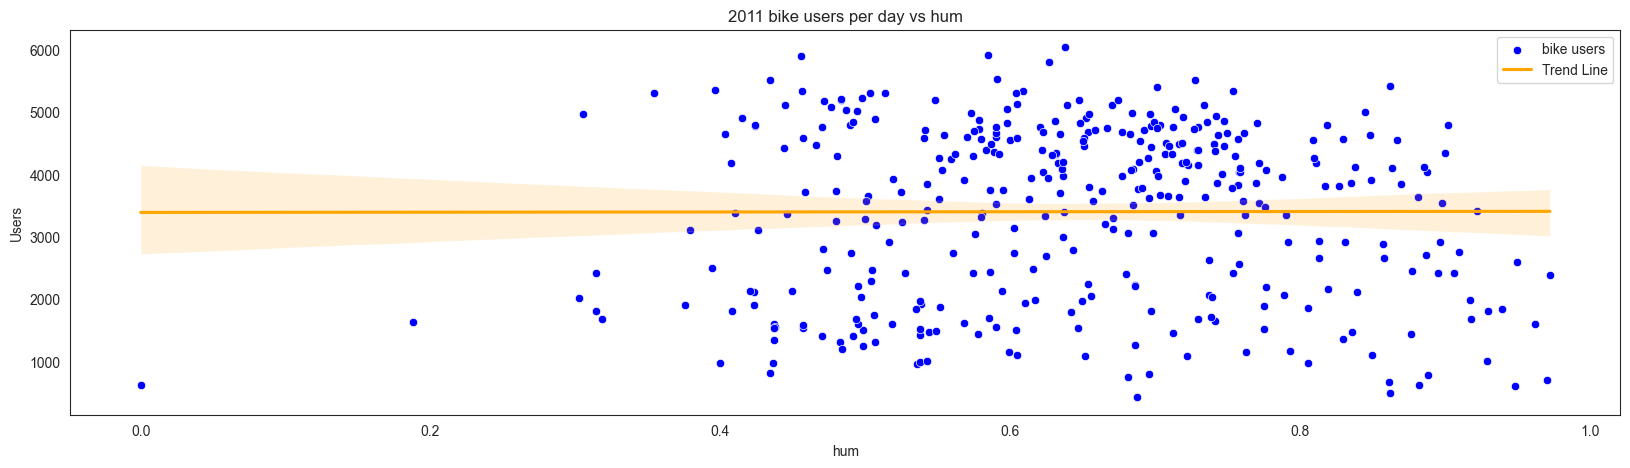

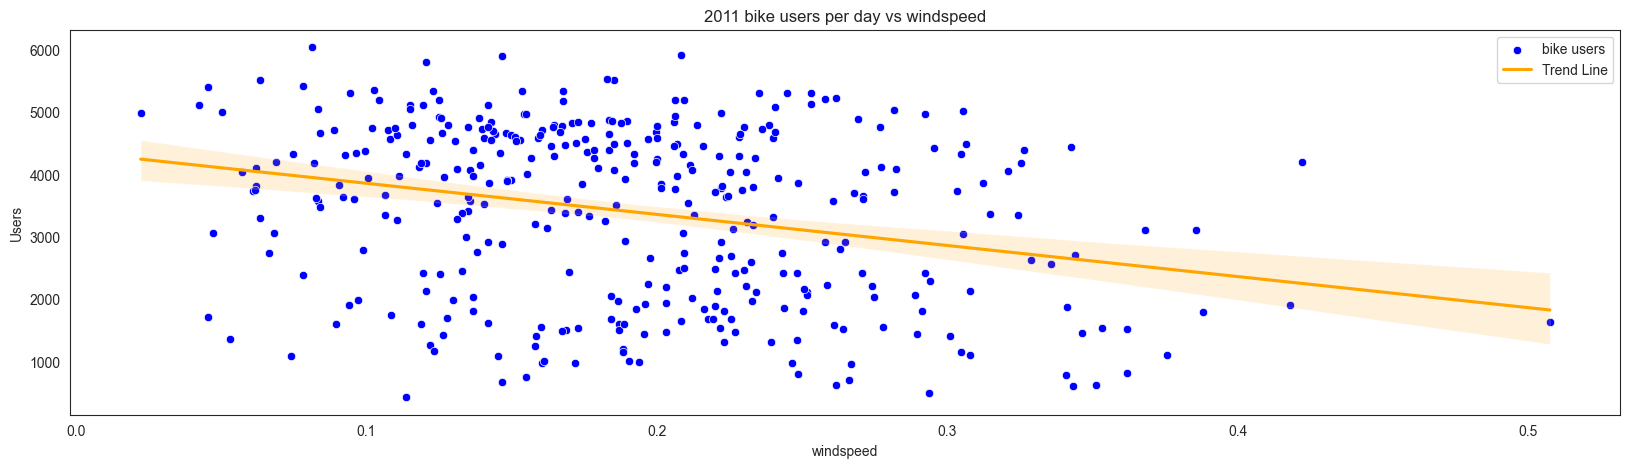

In [12]:
day_filter2011 = bike_day_str[(bike_day_str.index >= "2011-01-01") & (bike_day_str.index <= "2011-12-31")] 
ListofVariables = ["temp", "hum", "windspeed"]
for item in ListofVariables:
    sns.scatterplot(x=day_filter2011[item], y=day_filter2011['cnt'], label='bike users', color='blue')
    sns.regplot(x=day_filter2011[item], y=day_filter2011['cnt'], scatter=False, color='orange', label="Trend Line")
    plt.title(f'2011 bike users per day vs {item}')
    plt.ylabel('Users')
    plt.legend()
    plt.show()


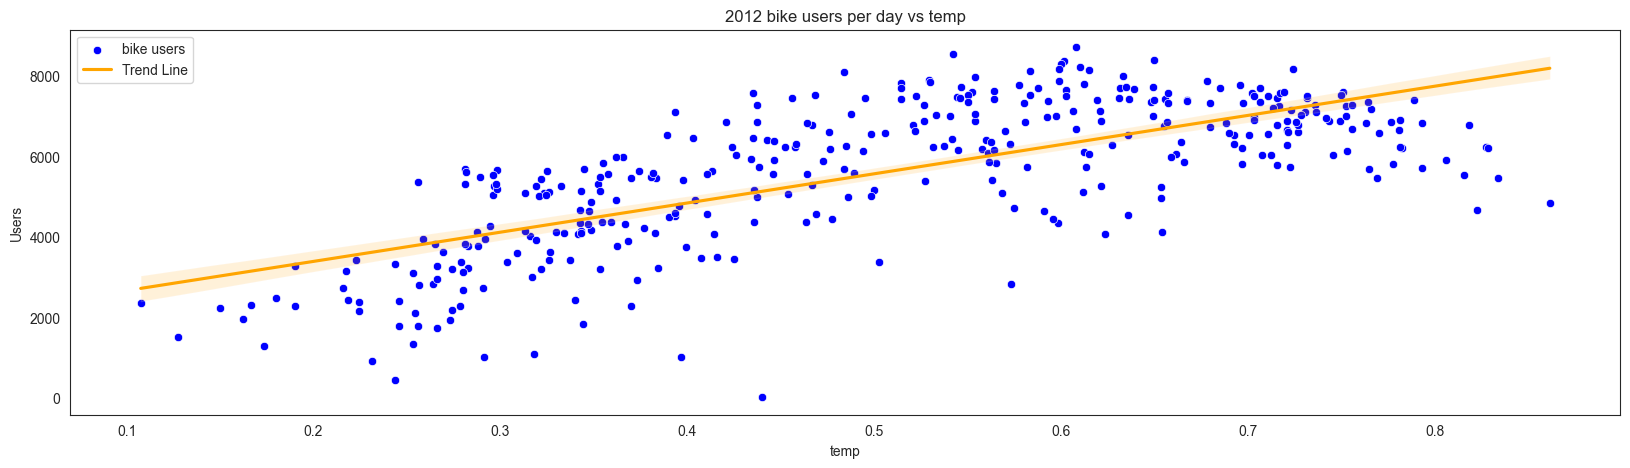

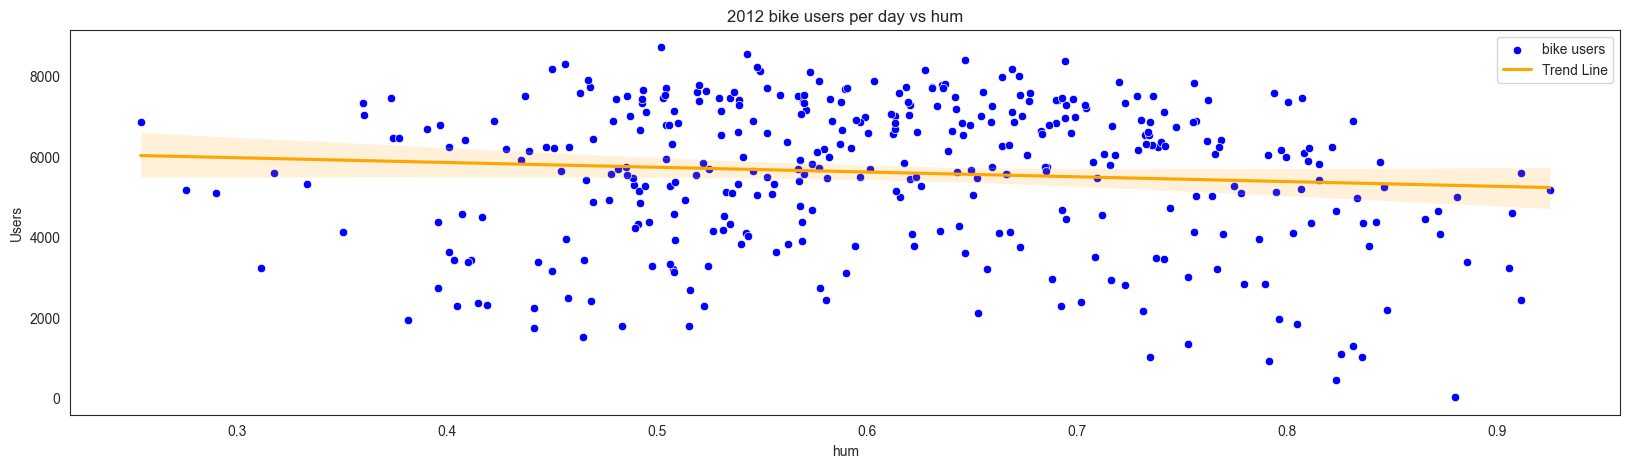

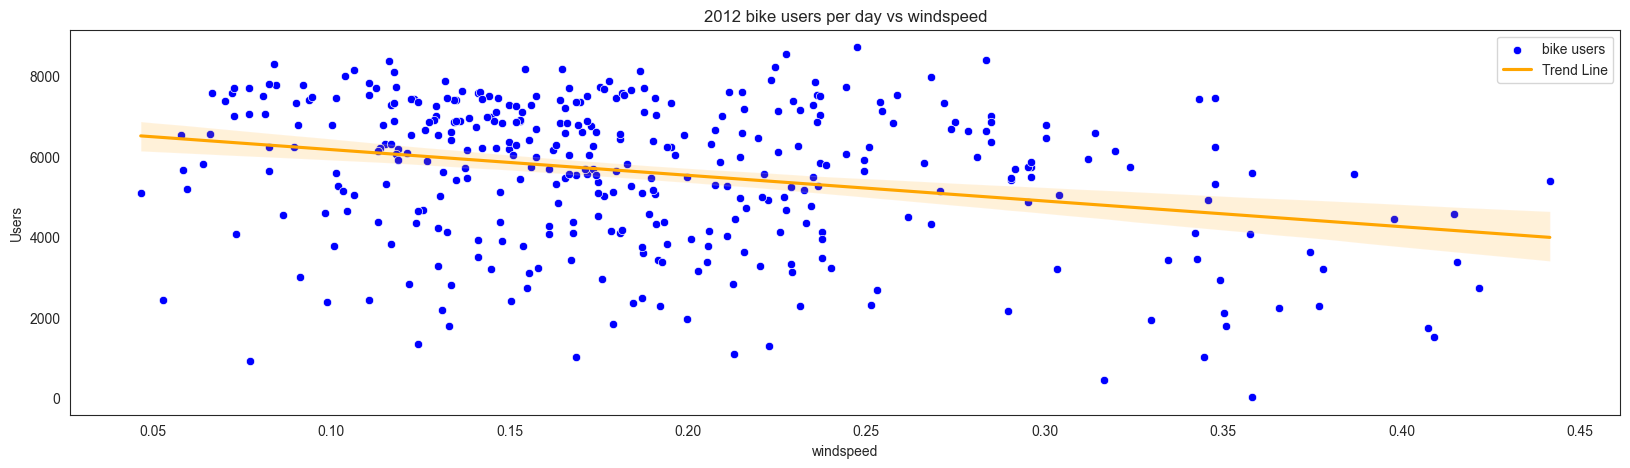

In [13]:
day_filter2012 = bike_day_str[(bike_day_str.index >= "2012-01-01") & (bike_day_str.index <= "2012-12-31")] 
ListofVariables = ["temp", "hum", "windspeed"]
for item in ListofVariables:
    sns.scatterplot(x=day_filter2012[item], y=day_filter2012['cnt'], label='bike users', color='blue')
    sns.regplot(x=day_filter2012[item], y=day_filter2012['cnt'], scatter=False, color='orange', label="Trend Line")
    plt.title(f'2012 bike users per day vs {item}')
    plt.ylabel('Users')
    plt.legend()
    plt.show()


By creating scatterplots and looking at the trend line for each of the three variables we see that for 
* temperature:  as temperature increases so does bike users 
* humidity: we see that there a very slight negative correlation as humidity increases
* windspeed : we see theres a negative correlation as windspeed starts increasing user count goes down


### Correlation Heatmap 

Now we will make a correlation heat map with all the variables to see the exact correlation values 

Text(0.5, 1.0, 'Correlation Heatmap')

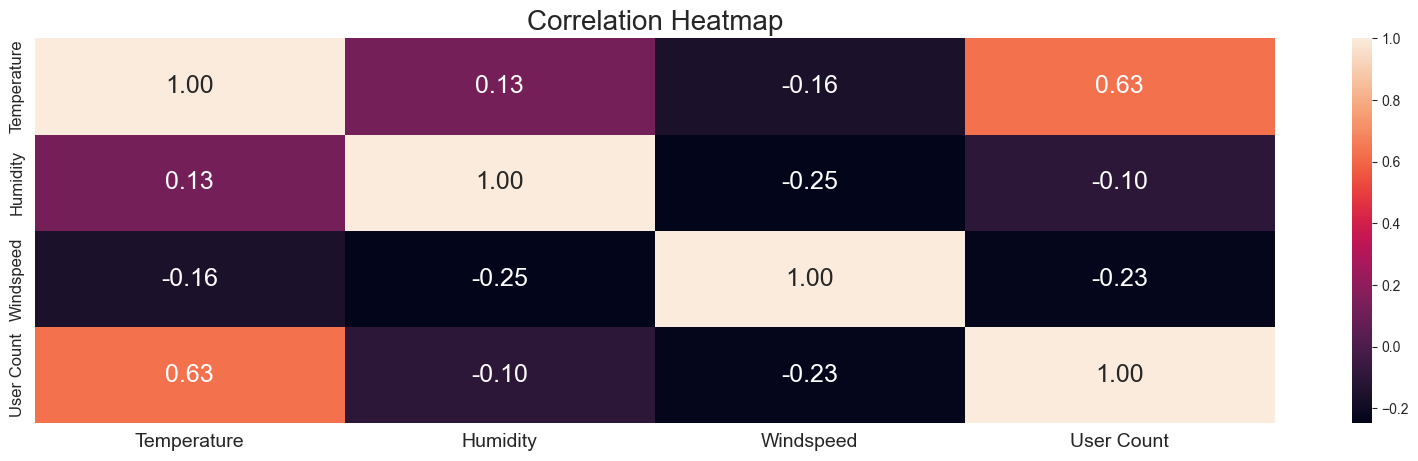

In [14]:
newcols = ["temp", "hum", "windspeed","cnt"]
newhour = bike_day.loc[:, newcols]
newhour_re = newhour.rename(columns={
    "temp": "Temperature",
    "hum": "Humidity",
    "windspeed": "Windspeed",
    "cnt": "User Count"
})

correlated_hr = newhour_re.corr()
heatmap = sns.heatmap(correlated_hr, annot = True, fmt = '.2f',  annot_kws={"size": 18})
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=14)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=12)
plt.title('Correlation Heatmap', fontsize=20)

Text(0.5, 1.0, '2012 correlation')

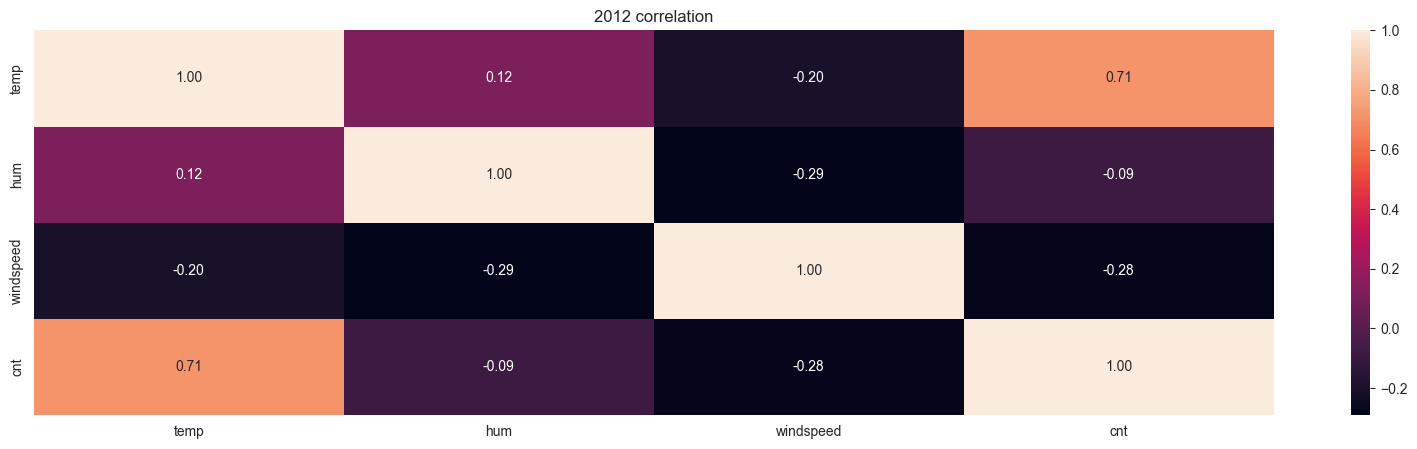

In [15]:
newhour12 = bike_2012day.loc[:, newcols]
correlated_hr12 = newhour12.corr()
sns.heatmap(correlated_hr12, annot = True, fmt = '.2f')
plt.title('2012 correlation')

Now we see that the highest correlated values is temperature for user count at 0.77 in 2011 and 0.71 in 2012 and humidity is not very correlated to user count and that windspeed has a negative correlation of -0.28 for both years

### Boxplot 

Will look at the distribution of data based on the weather situation 

In [16]:
day_weather_avg2011 = bike_2011day.groupby("weathersit")["cnt"].mean()
print(day_weather_avg2011)

weathersit
1    3694.986726
2    3088.096774
3    1674.133333
Name: cnt, dtype: float64


In [17]:
weather_avg2012 = bike_2012day.groupby("weathersit")["cnt"].mean()
print(weather_avg2012)


weathersit
1    6003.734177
2    4991.333333
3    2126.166667
Name: cnt, dtype: float64


C:\Users\thuth\AppData\Local\Temp\ipykernel_20008\1331783470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_2011day['year'] = '2011'
C:\Users\thuth\AppData\Local\Temp\ipykernel_20008\1331783470.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_2012day['year'] = '2012'
C:\Users\thuth\AppData\Local\Temp\ipykernel_20008\1331783470.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(ne

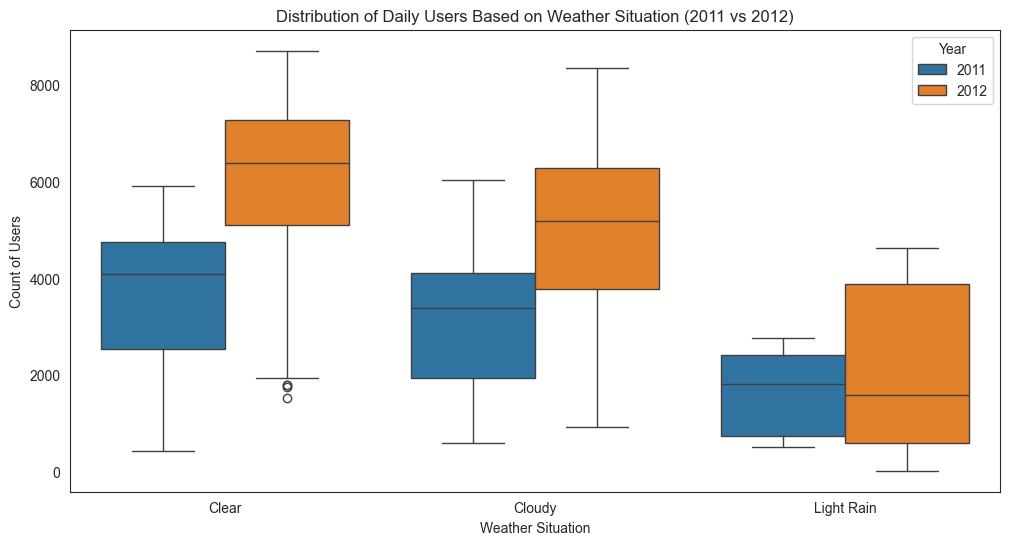

In [18]:
bike_2011day['year'] = '2011'
bike_2012day['year'] = '2012'

# Combine the two datasets
combined_data = pd.concat([bike_2011day, bike_2012day])

# Define new labels for weather situations
newlabel = ["Clear", "Cloudy", "Light Rain"]
palette = sns.color_palette('husl', 8)  # Adjust the palette as needed

# Create the combined boxplot
plt.figure(figsize=(12, 6))  # Adjust size as needed
sns.boxplot(x='weathersit', y='cnt', hue='year', data=combined_data)

# Set the x-axis labels
plt.gca().set_xticklabels(newlabel)

# Set the title and labels
plt.title("Distribution of Daily Users Based on Weather Situation (2011 vs 2012)")
plt.xlabel("Weather Situation")
plt.ylabel("Count of Users")

# Show the plot
plt.legend(title='Year')
plt.show()

C:\Users\thuth\AppData\Local\Temp\ipykernel_20008\3631131476.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(newlabel)


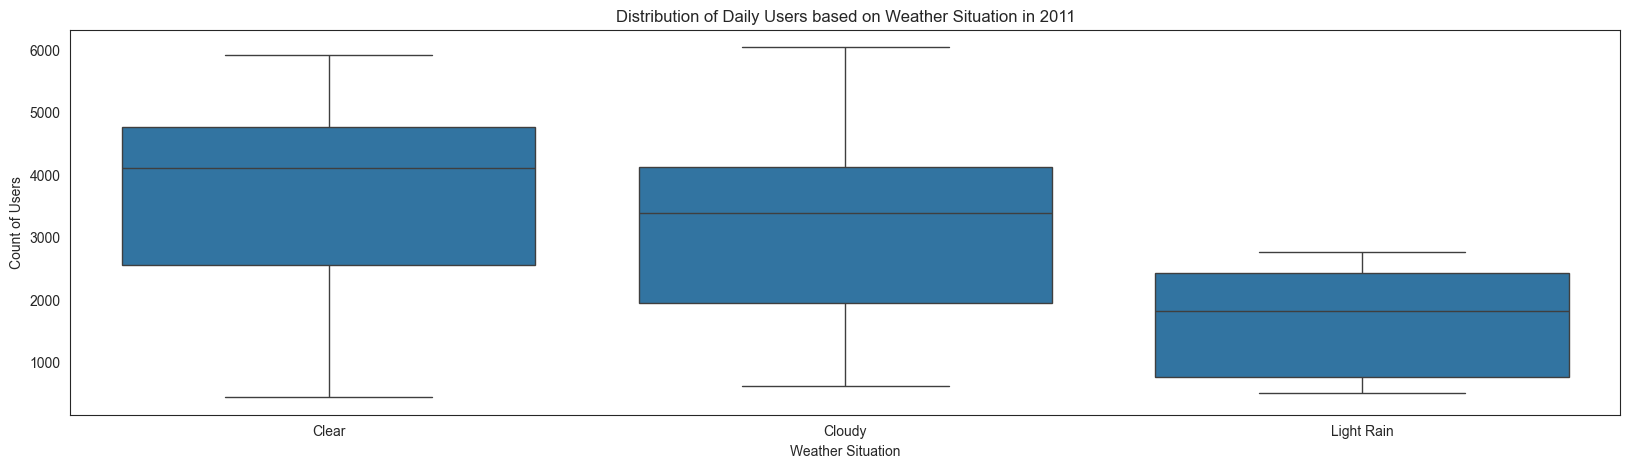

In [19]:
sns.boxplot(x='weathersit', y='cnt', data=bike_2011day)
newlabel = ["Clear", "Cloudy", "Light Rain"]
plt.gca().set_xticklabels(newlabel)
plt.title("Distribution of Daily Users based on Weather Situation in 2011")
plt.xlabel("Weather Situation")
plt.ylabel("Count of Users")
plt.show()

C:\Users\thuth\AppData\Local\Temp\ipykernel_20008\2301958037.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(newlabel)


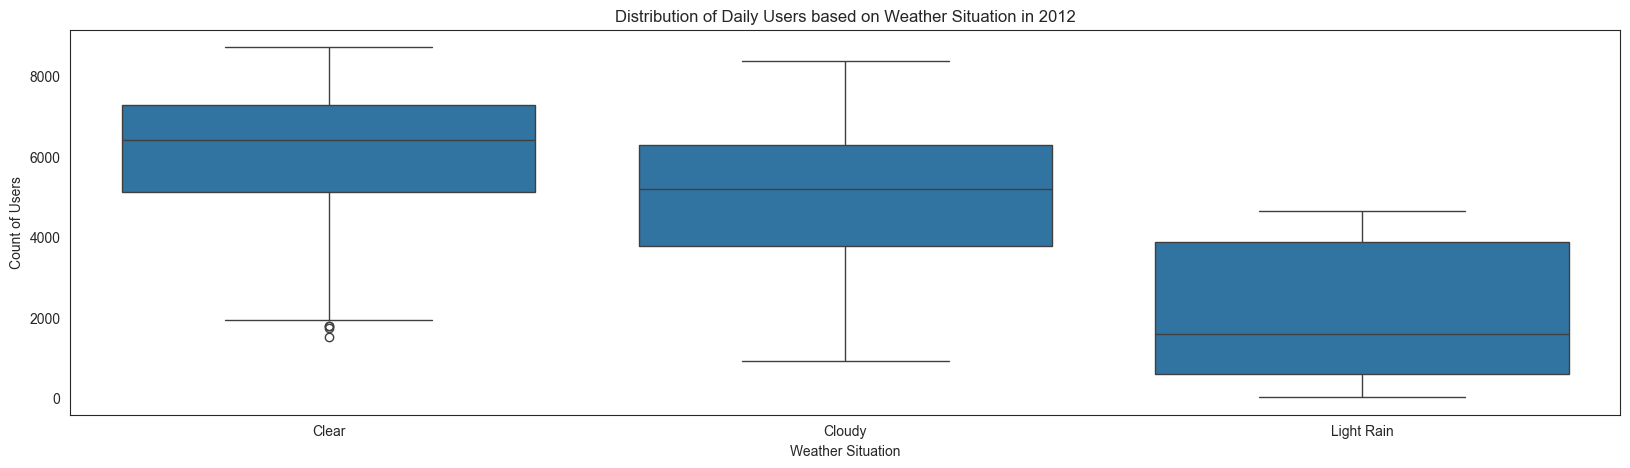

In [20]:
sns.boxplot(x='weathersit', y='cnt', data=bike_2012day)
newlabel = ["Clear", "Cloudy", "Light Rain"]
plt.gca().set_xticklabels(newlabel)
plt.title("Distribution of Daily Users based on Weather Situation in 2012")
plt.xlabel("Weather Situation")
plt.ylabel("Count of Users")
plt.show()

Looking at this we see that most bike users are recorded when the weather has clear skies followed closely by when the sky is cloudy. Theres much less users when it is raining outside. We also see that in 2012 the median, average number of users, and total users all increased!

## User Behavior

### User Count

We will be looking at the differences and characteristics between casual and registered users. 

In [21]:
cas2011 = round(bike_2011day["casual"].mean(), 2)
cas2011sum = round(bike_2011day["casual"].sum(), 2)
reg2011 = round(bike_2011day["registered"].mean(),2)
reg2011sum = round(bike_2011day["registered"].sum(),2)

print("for 2011 the total casual user was", cas2011sum, "and the total registered user was", reg2011sum)
print("average casual user was", cas2011, "while the number of average registered users was", reg2011)


for 2011 the total casual user was 247252 and the total registered user was 995851
average casual user was 677.4 while the number of average registered users was 2728.36


In [22]:
cas2012 = round(bike_2012day["casual"].mean(), 2)
cas2012sum = round(bike_2012day["casual"].sum(), 2)
reg2012 = round(bike_2012day["registered"].mean(),2)
reg2012sum = round(bike_2012day["registered"].sum(),2)
print("for 2012 the total casual user was", cas2012sum, "and the total registered user was", reg2012sum)
print("in 2012 the average casual user was", cas2012, "while the number of average registered users was", reg2012)

for 2012 the total casual user was 372765 and the total registered user was 1676811
in 2012 the average casual user was 1018.48 while the number of average registered users was 4581.45


The number of total user from 2011 to 2012 increased by 60% 

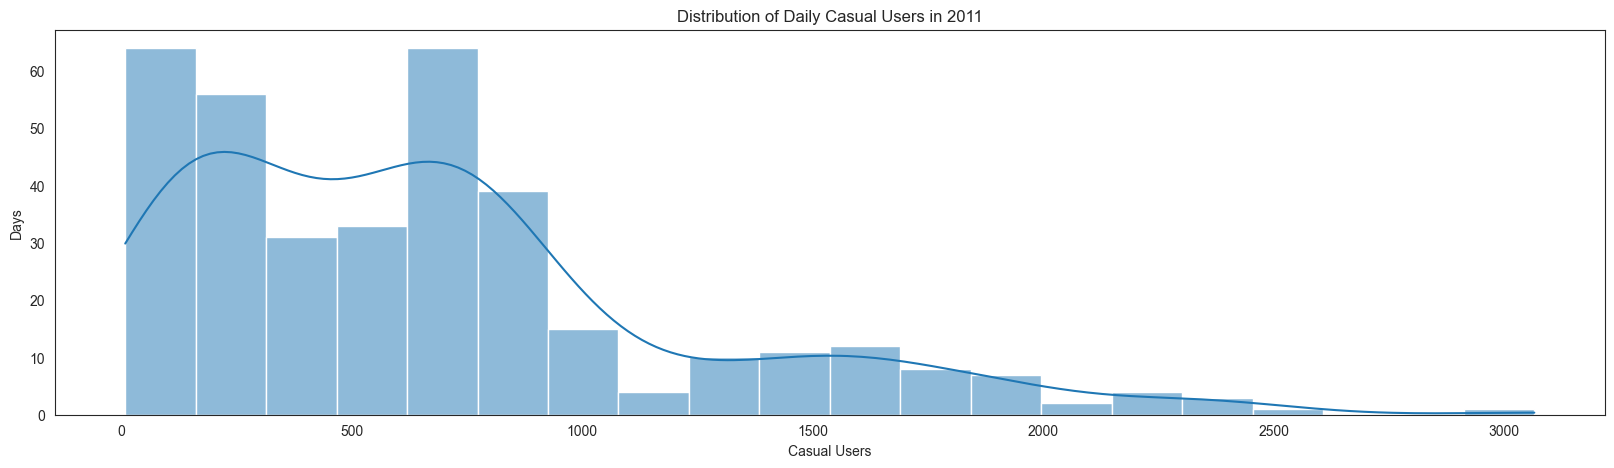

In [23]:
sns.histplot(bike_2011day['casual'], kde=True, bins=20)
plt.title('Distribution of Daily Casual Users in 2011')
plt.xlabel('Casual Users')
plt.ylabel('Days')
plt.show()

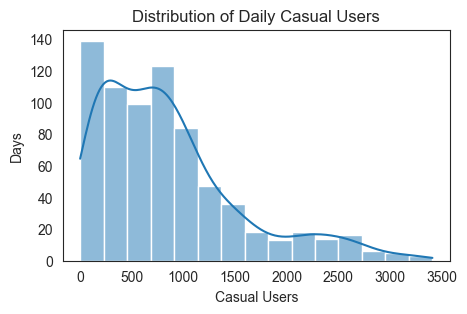

In [24]:
plt.figure(figsize=(5, 3))

sns.histplot(bike_day['casual'], kde=True, bins=15)
plt.title('Distribution of Daily Casual Users')
plt.xlabel('Casual Users')
plt.ylabel('Days')

plt.show()

We see that for casual users the distribution is positively skewed to the right for both 2011 and 2012. In 2011 for casual users we see that most days have 0-1000 users and in 2012 its 0-1500. We see that anything after 1000 & 1500 respectively is rare for casual users. It uncommon to have a lot of days with high usage by casual users the days that it occur probably due to an event or holiday. 

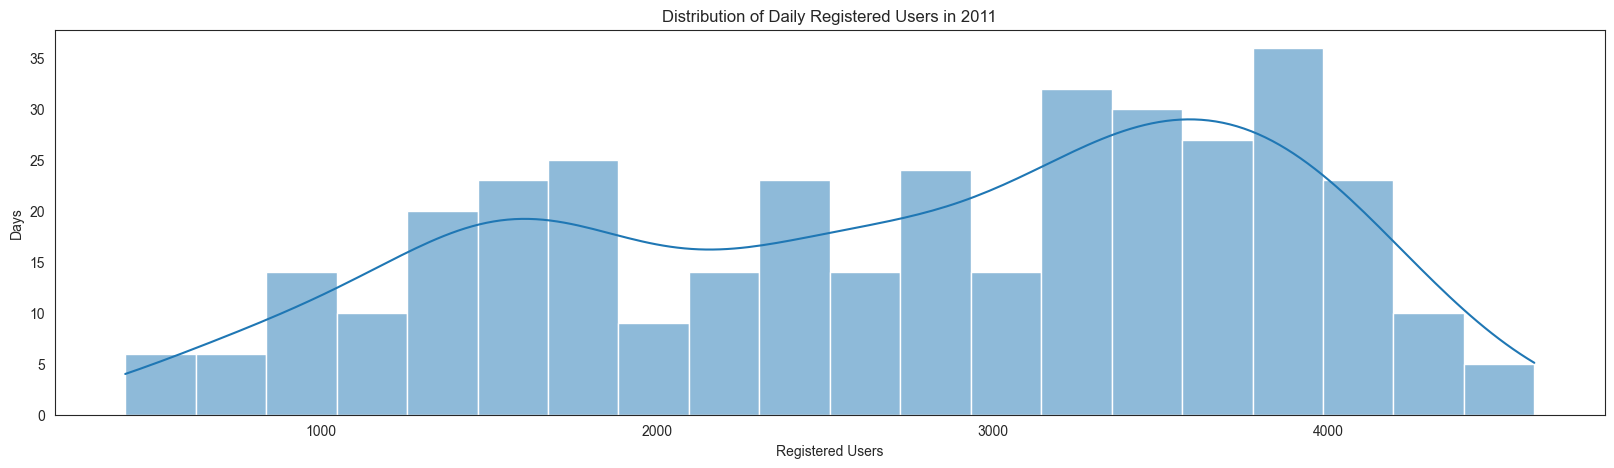

In [25]:
sns.histplot(bike_2011day['registered'], kde=True, bins=20)
plt.title('Distribution of Daily Registered Users in 2011')
plt.xlabel('Registered Users')
plt.ylabel('Days')

plt.show()

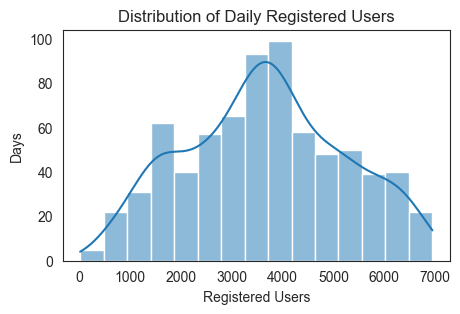

In [26]:
plt.figure(figsize=(5, 3))

sns.histplot(bike_day['registered'], kde=True, bins=15)
plt.title('Distribution of Daily Registered Users')
plt.xlabel('Registered Users')
plt.ylabel('Days')

plt.show()

The distribution for registered users follows a bimodal distribution in 2011 with peaks around 1700 and 3500 registered users. Most days have around 1000 to 4000 registered users. In 2012 it is left skewed and most days there are around 3500 -7000 registered users and the peak in 2012 is at 5000 users. 




### Usage Pattern

### Time of Day

In [27]:
hr_user = bike_hour.groupby("hr")["cnt"].sum()
hr_cas = bike_hour.groupby("hr")["casual"].sum()
hr_reg = bike_hour.groupby("hr")["registered"].sum()
hr2011= pd.concat([hr_user, hr_cas, hr_reg], axis=1)


In [28]:
hr_u = bike_2012hr.groupby("hr")["cnt"].sum()
hr_c = bike_2012hr.groupby("hr")["casual"].sum()
hr_r = bike_2012hr.groupby("hr")["registered"].sum()

hr2012= pd.concat([hr_u, hr_c,hr_r], axis=1)


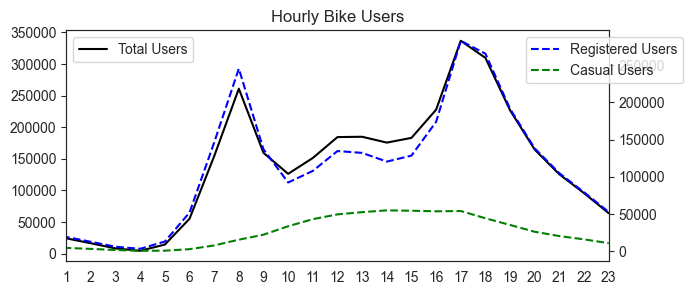

In [29]:

fig, ax1 = plt.subplots(figsize=(7, 3)) 

ax1.plot(hr2011['cnt'], color ='black', label ='Total Users')
ax1.xaxis.set_major_locator(plt.MaxNLocator(min_n_ticks=12, integer=True))
ax2 = ax1.twinx() 
ax2.plot(hr2011['registered'], color ='blue', linestyle ='--',label = 'Registered Users')
ax2.plot(hr2011['casual'], color ='green',linestyle ='--', label ='Casual Users')
ax1.legend()
plt.xlim(1,23)
ax2.legend(loc='upper right', bbox_to_anchor=(1.15,1))
plt.title("Hourly Bike Users")

plt.show()

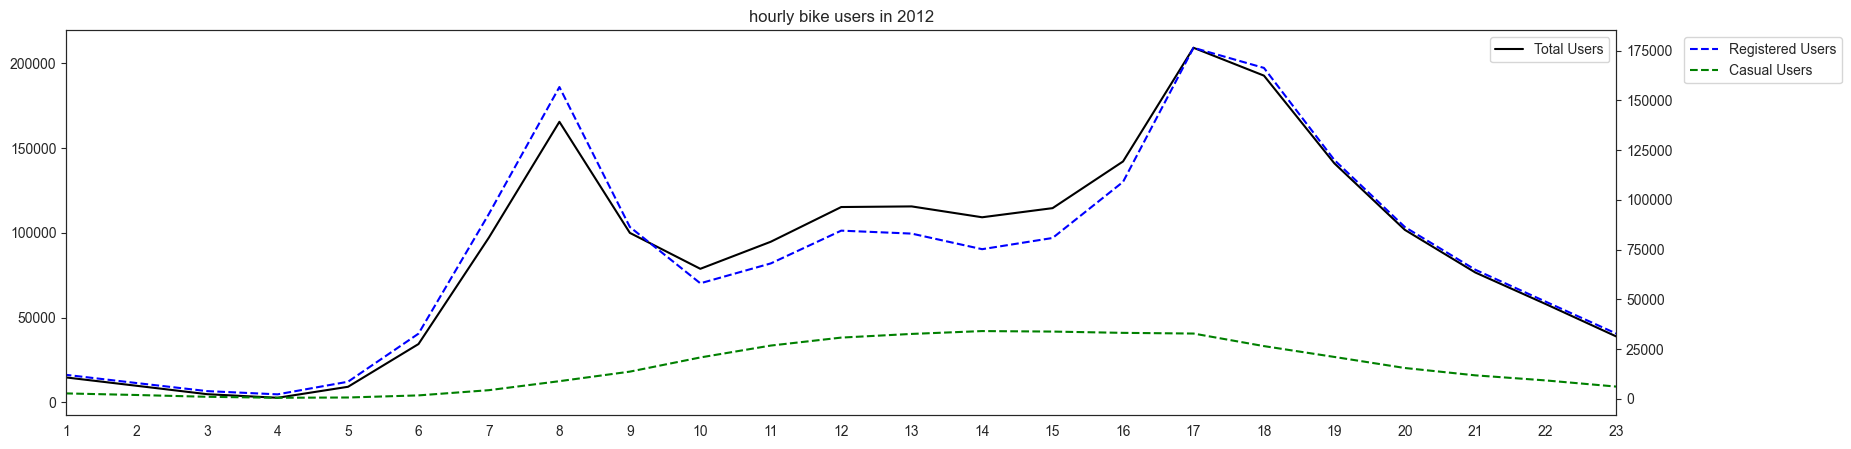

In [30]:
fig, ax1 = plt.subplots() 
ax1.plot(hr2012['cnt'], color ='black', label ='Total Users')
ax1.xaxis.set_major_locator(plt.MaxNLocator(min_n_ticks=12, integer=True))
ax2 = ax1.twinx() 
ax2.plot(hr2012['registered'], color ='blue', linestyle ='--',label = 'Registered Users')
ax2.plot(hr2012['casual'], color ='green',linestyle ='--', label ='Casual Users')
ax1.legend()
plt.xlim(1,23)
ax2.legend(loc='upper right', bbox_to_anchor=(1.15,1))
plt.title("hourly bike users in 2012")

plt.show()

For both 2011 and 2012 they follow very similar pattern with registered users peak time is at 8am and 5pm which indicates it probably being used for work schedule where as casual users peak time is in the afternoon around 12pm-3pm

### Day of the week

In [31]:
user = bike_day.groupby("weekday")["cnt"].sum()
reg = bike_day.groupby("weekday")["registered"].sum()
cas= bike_day.groupby("weekday")["casual"].sum()
daily= pd.concat([user, reg, cas], axis=1)
weekday = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
daily.index = weekday

In [32]:
user11 = bike_2011day.groupby("weekday")["cnt"].sum()
reg11 = bike_2011day.groupby("weekday")["registered"].sum()
cas11= bike_2011day.groupby("weekday")["casual"].sum()
daily2011= pd.concat([user11, reg11, cas11], axis=1)
weekday = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
daily2011.index = weekday
print(daily2011)

              cnt  registered  casual
Sunday     177074      117471   59603
Monday     180221      148661   31560
Tuesday    180338      156349   23989
Wednesday  169169      148509   20660
Thursday   174552      152112   22440
Friday     182006      152553   29453
Saturday   179743      120196   59547


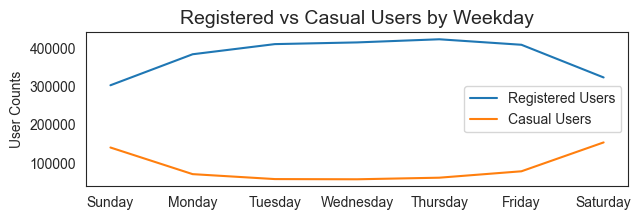

In [33]:
fig, ax = plt.subplots(figsize=(7, 2))
ax1 = ax.plot(daily.index, daily['registered'], label='Registered Users')
ax2 = ax.plot(daily.index, daily['casual'],  label='Casual Users')
ax.set_ylabel('User Counts')
ax.set_title('Registered vs Casual Users by Weekday', fontsize = 14 )
ax.tick_params(axis='x', labelsize=10)

ax.legend()
plt.show()

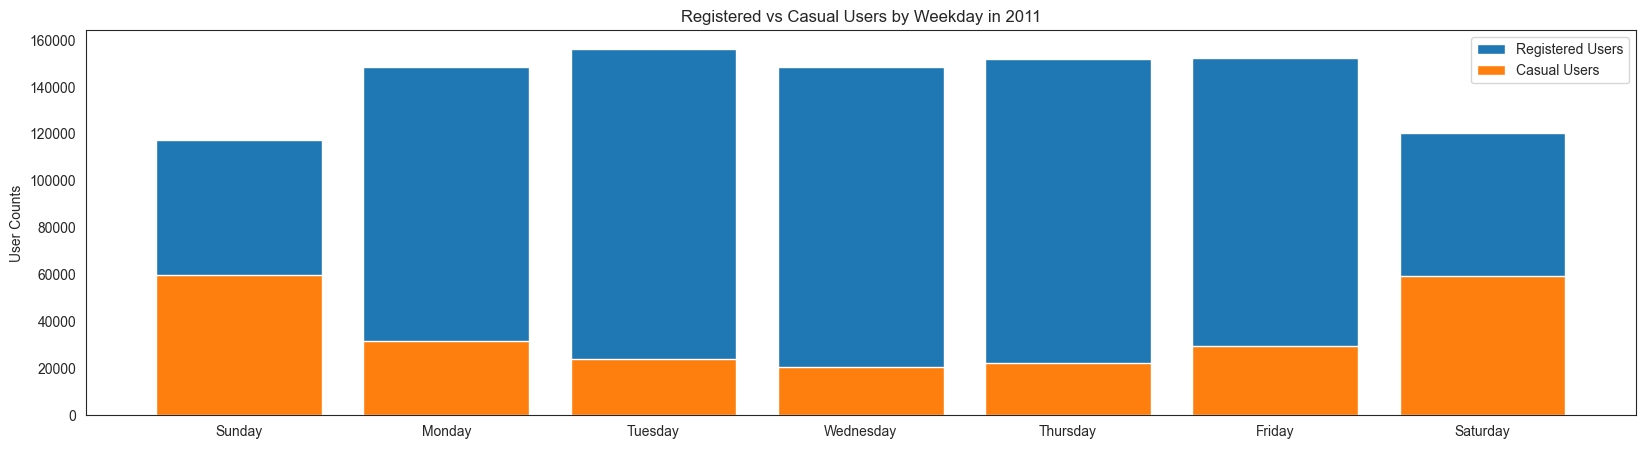

In [34]:
fig, ax = plt.subplots()
ax1 = ax.bar(daily2011.index, daily2011['registered'], label='Registered Users')
ax2 = ax.bar(daily2011.index, daily2011['casual'],  label='Casual Users')
ax.set_ylabel('User Counts')
ax.set_title('Registered vs Casual Users by Weekday in 2011')
ax.legend()
plt.show()

In [35]:
user12 = bike_2012day.groupby("weekday")["cnt"].sum()
reg12 = bike_2012day.groupby("weekday")["registered"].sum()
cas12= bike_2012day.groupby("weekday")["casual"].sum()
daily2012= pd.concat([user12, reg12, cas12], axis=1)
weekday = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
daily2012.index = weekday
print(daily2012)

              cnt  registered  casual
Sunday     266953      186035   80918
Monday     275282      236058   39224
Tuesday    288771      254917   33854
Wednesday  303879      267220   36659
Thursday   310843      271823   39020
Friday     305784      256999   48785
Saturday   298064      203759   94305


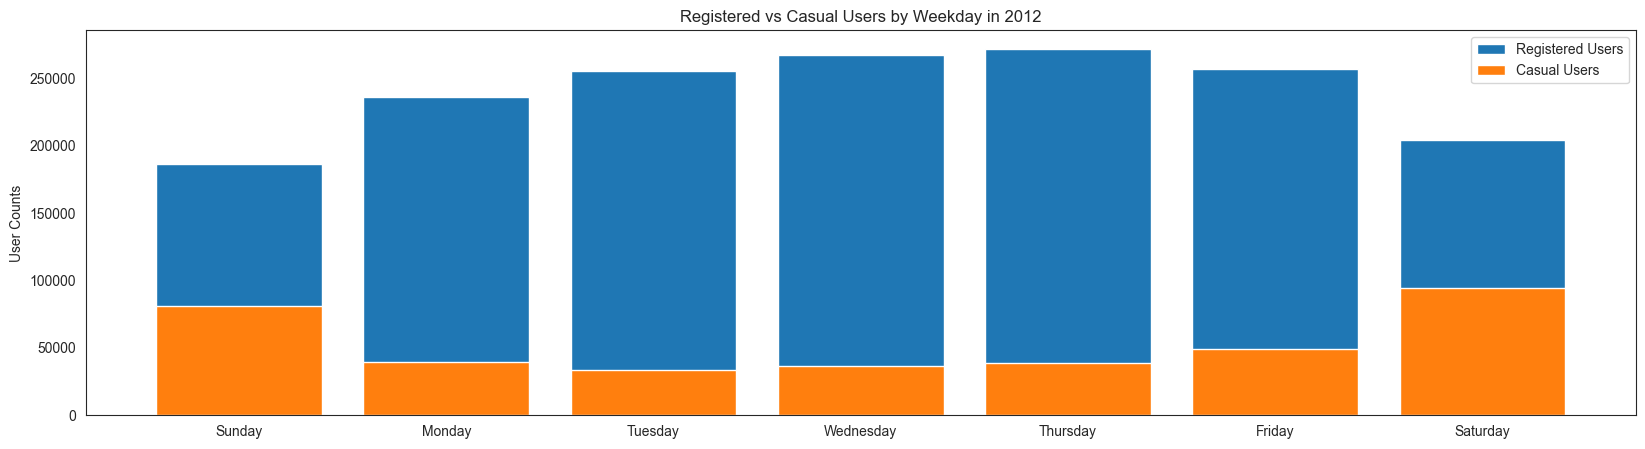

In [36]:
fig, ax = plt.subplots()
ax1 = ax.bar(daily2012.index, daily2012['registered'], label='Registered Users')
ax2 = ax.bar(daily2012.index, daily2012['casual'],  label='Casual Users')
ax.set_ylabel('User Counts')
ax.set_title('Registered vs Casual Users by Weekday in 2012')
ax.legend()
plt.show()

both years have the same pattern where we see that casual users are more pronounced in the weekend they double the amount of casual users during a weekday. For registered users we see that it's much higher during the weekday and theres a drop in usage on the weekend. 

### OLS Regression Model 

In [37]:
#2011
in_cols = ['temp', 'hum' ,
       'windspeed']
dep_cols = ['cnt']
independent_variable = bike_2011day.loc[:, in_cols]
independent_variable = sm.add_constant(independent_variable)
dependent_variable = bike_2011day.loc[:, dep_cols]
regression_model = sm.OLS(dependent_variable,independent_variable).fit() 
print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     228.4
Date:                Mon, 25 Nov 2024   Prob (F-statistic):           4.84e-83
Time:                        17:09:07   Log-Likelihood:                -2961.8
No. Observations:                 365   AIC:                             5932.
Df Residuals:                     361   BIC:                             5947.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2401.6117    259.795      9.244      0.0

In [38]:
#2012
in_cols = ['temp', 'hum' ,
       'windspeed']
dep_cols = ['cnt']
independent_variable12 = bike_2012day.loc[:, in_cols]
independent_variable12 = sm.add_constant(independent_variable12)
dependent_variable12 = bike_2012day.loc[:, dep_cols]
regression_model12 = sm.OLS(dependent_variable12,independent_variable12).fit() 
print(regression_model12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     164.4
Date:                Mon, 25 Nov 2024   Prob (F-statistic):           3.04e-67
Time:                        17:09:07   Log-Likelihood:                -3102.6
No. Observations:                 366   AIC:                             6213.
Df Residuals:                     362   BIC:                             6229.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4785.2297    418.038     11.447      0.0

Looking at the regression model we see that in 2011 the R squared is  0.655 and in 2012 it is 0.577 indicating that these factors (temp, humidity, & windspeed) are factors that play a role in user count. 

### Seasonality + Prediction

In [39]:
Prediction= regression_model.predict(independent_variable)
bike_2011day["Prediction"]= Prediction


C:\Users\thuth\AppData\Local\Temp\ipykernel_20008\31171878.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_2011day["Prediction"]= Prediction


In [40]:
Prediction= regression_model12.predict(independent_variable12)
bike_2012day["Prediction"]= Prediction

C:\Users\thuth\AppData\Local\Temp\ipykernel_20008\2992327394.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_2012day["Prediction"]= Prediction


In [41]:
u11 = bike_2011day.groupby("mnth")["cnt"].sum()
c11 = bike_2011day.groupby("mnth")["casual"].sum()
r11 = bike_2011day.groupby("mnth")["registered"].sum()
t11 = bike_2011day.groupby("mnth")["temp"].mean()
p11 = bike_2011day.groupby("mnth")["Prediction"].sum()

monthly2011= pd.concat([u11,c11,r11, t11, p11], axis=1)
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun","Jul", "Aug", "Sept", "Oct", "Nov", "Dec"]

monthly2011.index = months


In [42]:
u12 = bike_2012day.groupby("mnth")["cnt"].sum()
c12 = bike_2012day.groupby("mnth")["casual"].sum()
r12 = bike_2012day.groupby("mnth")["registered"].sum()
t12 = bike_2012day.groupby("mnth")["temp"].mean()
p12 = bike_2012day.groupby("mnth")["Prediction"].sum()

monthly2012= pd.concat([u12,c12,r12, t12,p12], axis=1)
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun","Jul", "Aug", "Sept", "Oct", "Nov", "Dec"]
monthly2012.index = months

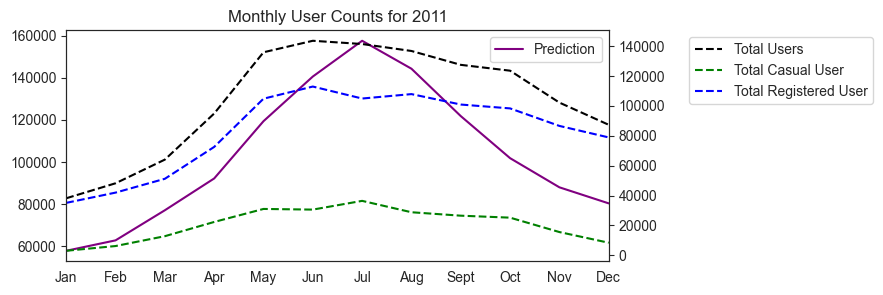

In [43]:
fig, ax1 = plt.subplots(figsize=(7, 3)) 
ax1.plot(monthly2011['Prediction'], color ='purple',  label ='Prediction')
ax2 = ax1.twinx()
ax2.plot(monthly2011['cnt'], color ='black', linestyle ='--', label ='Total Users')
ax2.plot(monthly2011['casual'], color ='green', linestyle ='--',label = 'Total Casual User')
ax2.plot(monthly2011['registered'], color ='blue',linestyle ='--', label ='Total Registered User')
 
ax1.legend()
plt.xlim(0,11)
ax2.legend(loc='upper right', bbox_to_anchor=(1.5,1))
plt.title("Monthly User Counts for 2011")

plt.show()

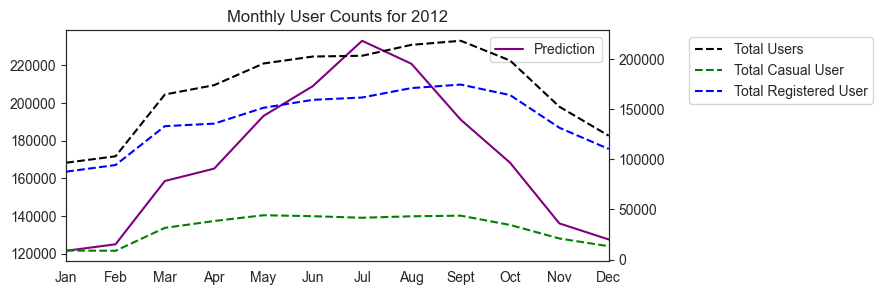

In [44]:
fig, ax1 = plt.subplots(figsize=(7, 3)) 
ax1.plot(monthly2012['Prediction'], color ='purple',  label ='Prediction')
ax2 = ax1.twinx() 
ax2.plot(monthly2012['cnt'], color ='black', linestyle = '--', label ='Total Users')
ax2.plot(monthly2012['casual'], color ='green', linestyle ='--',label = 'Total Casual User')
ax2.plot(monthly2012['registered'], color ='blue',linestyle ='--', label ='Total Registered User')
ax1.legend()

plt.xlim(0,11)
ax2.legend(loc='upper right', bbox_to_anchor=(1.5,1))
plt.title("Monthly User Counts for 2012")

plt.show()

In 2011 we see that it starts low in the begining of the year when it's winter and it starts steadily increasing during spring peaks in the summer during June and during fall starts to decline and the decline gets sharper as winter hits. 
In 2012 we see that starts low and theres a big spike from February to March and it continues to steadily increase through summer and into fall peaking at September and then it starts to drop and decrease through winter. The prediction lines are much steeper than the actual values we see a sharp peak in th middle of summer. 